In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=dataset.iloc[:,[3,4]].values

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init ='k-means++',random_state=42,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

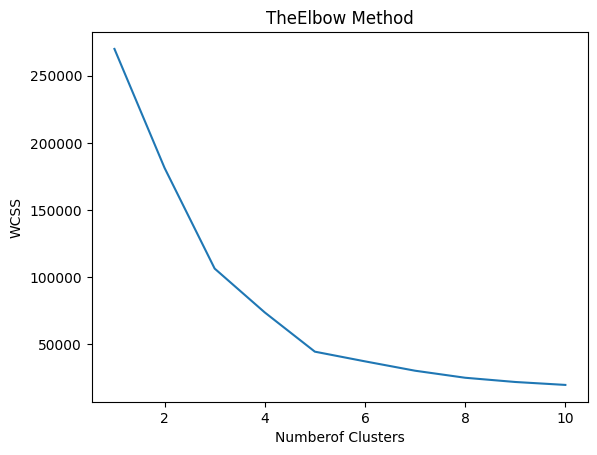

In [7]:
plt.plot(range(1,11), wcss)
plt.title('TheElbow Method')
plt.xlabel('Numberof Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++')#random_state=42
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


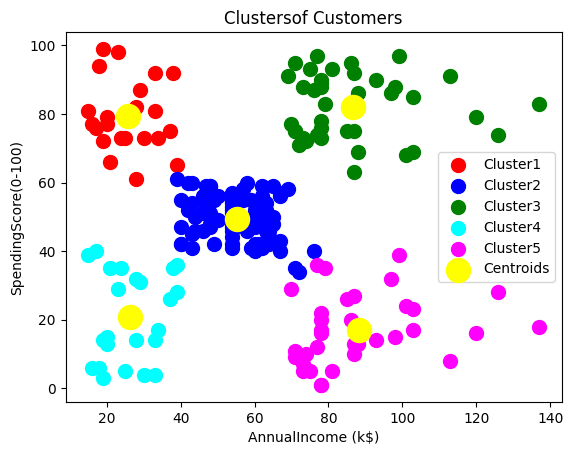

In [10]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clustersof Customers')
plt.xlabel('AnnualIncome (k$)')
plt.ylabel('SpendingScore(0-100)')
plt.legend()
plt.show()

In [11]:
kmeans.cluster_centers_


array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
dists=euclidean_distances(kmeans.cluster_centers_)
dists

array([[ 0.        , 42.0125959 , 60.87399712, 58.45344151, 88.19196851],
       [42.0125959 ,  0.        , 45.16043124, 40.72844557, 46.1810353 ],
       [60.87399712, 45.16043124,  0.        , 85.88040796, 65.03514763],
       [58.45344151, 40.72844557, 85.88040796,  0.        , 62.01211429],
       [88.19196851, 46.1810353 , 65.03514763, 62.01211429,  0.        ]])

In [14]:
tri_dists=dists[np.triu_indices(5,1)]
max_dist,avg_dist,min_dist=tri_dists.max(),tri_dists.mean(),tri_dists.min()
avg_dist

59.45295850129899

In [19]:
wcss = []
for i in range(2,11):
  print(f'--Cluster {i}--')
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print('--Cluster Centers--')
  print(kmeans.cluster_centers_)

  print('--EuclideanDistance--')
  dists=euclidean_distances(kmeans.cluster_centers_)
  print(dists)

  print('--AvgDist--')
  tri_dists=dists
  [np.triu_indices(i,1)]
  max_dist,avg_dist,min_dist=tri_dists.max(),tri_dists.mean(),tri_dists.min()

  print(avg_dist)
  print('\n\n')

--Cluster 2--
--Cluster Centers--
[[79.6        50.12727273]
 [37.28888889 50.28888889]]
--EuclideanDistance--
[[ 0.         42.31141977]
 [42.31141977  0.        ]]
--AvgDist--
21.15570988669775



--Cluster 3--
--Cluster Centers--
[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]
--EuclideanDistance--
[[ 0.         53.00033141 53.28812183]
 [53.00033141  0.         63.49830355]
 [53.28812183 63.49830355  0.        ]]
--AvgDist--
37.73039039812312



--Cluster 4--
--Cluster Centers--
[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [48.26       56.48      ]]
--EuclideanDistance--
[[ 0.         85.88040796 60.73851557 41.79783557]
 [85.88040796  0.         63.49830355 46.07679507]
 [60.73851557 63.49830355  0.         54.1598613 ]
 [41.79783557 46.07679507 54.1598613   0.        ]]
--AvgDist--
44.0189648775558



--Cluster 5--
--Cluster Centers--
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304